# Day 19 Pre-class Assignment: ZOMBIES!!

### <p style="text-align: right;"> &#9989; Cesarine Graham</p>

____
<img src="https://s-media-cache-ak0.pinimg.com/736x/68/d3/bc/68d3bccc93b1c64bd46c80e95bd400ee.jpg" width=300px>

### Goals for today's pre-class assignment:
* Continue to explore compartmental models using `solve_ivp`
* Understand the dynamics of a disease outbreak models and the parameters that determine their behavior.
* Create a project proposal for your semester project

**Important note**: Part of this pre-class assignment involves putting together a short project proposal. Make sure you allot sufficient time to do this, even if it means you don't quite get all other parts of this pre-class assignment completed!

### Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into appropriate "Pre-class assignments" submission folder.  Submission instructions can be found at the end of the notebook.

---
In this notebook, we model a zombie invasion and use it to demonstrate how to use SciPy's `solve_ivp`. The model used here is described in the paper by Munz et al.:

[Munz, Hudea, Imad, Smith, "When zombies attack!: mathematical modelling of an outbreak of zombie infection." In J.M. Tchuenche and C. Chiyaka, editors, Infectious Disease Modelling Research Progress, 133-150, 2009.](http://loe.org/images/content/091023/Zombie%20Publication.pdf)

<br>

For those interested, the original [code from the paper is here](http://scipy.github.io/old-wiki/pages/Cookbook/Zombie_Apocalypse_ODEINT), which has been modified below to improve readability. In this assignment you will be starting with basic, working code and modifying it to model more interesting scenarios. First, read through the following description of the problem and model.

The zombie model is a [**compartmental model**](https://en.wikipedia.org/wiki/Multi-compartment_model) that uses three compartments **S**, **Z**, and **R**.  This is discussed on the chalk board here and in more detail with slightly different, clearer, variables below.  

<img src="https://i.imgur.com/9HTp47I.png" width=800>

As discussed in the Munz et al paper, the compartments represent three groups:
- Susceptible (S)
- Zombie (Z)
- Removed (R)

In short, the _Susceptibles_ are healthy humans that can increase in number with more births and decrease through natural deaths.  Furthermore, _Susceptibles_ can become _Zombies_ via a failed encounter to defend oneself from a zombie.   The _Zombies_ can come from two sources: the resurrected from the deceased (_Removed_ group) and from _Susceptibles_ who have ‘lost’ an encounter with a zombie.  _Zombies_ reduce upon being defeated.  The _Removed_ group represent dead humans and zombies.  This post-apocalyptic world can be represented graphically as a compartmental model:  

### SZR MODEL
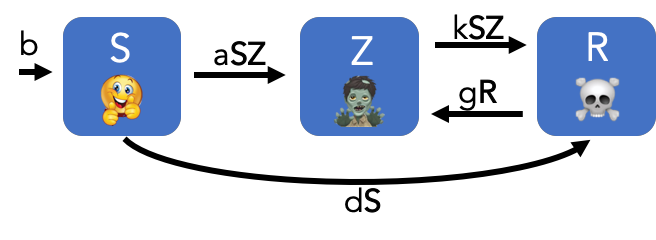
The ODE version of this, using the notation in the immediate model above and in the code below, is:

$\frac{dS}{dt} = b - aSZ - dS,$

$\frac{dZ}{dt} = aSZ + gR - kSZ,$

$\frac{dR}{dt} = dS + kSZ - gR.$

**Note**: The code below doesn't use the same parameter names that are stated in the paper and so you shouldn't be trying to compare the plots in the paper to the ones that you get. In fact, it turns out that the author of the paper was a bit sloppy with their code and wasn't consistent with the parameters used in their model. Additionally, they didn't use an accurate solver like `solve_ivp` to evolve their system! If you take a look at their code at the end of the paper, you can even see that they made a simplifying assumption in their model that isn't well explained in the paper. This is a good example of how **_not_** to write a high-quality paper. Of course, exploring this model is still valuable and we'll make sure we do it correctly!

**Run the code below to make sure it works and produces three plots. Review the code and make sure you understand how it works.**

In [1]:
# Basic Zombie Model
#
# This code runs the basic zombie model for three different initial
# conditions for the same model. You will do something very similar, but 
# run the same initial conditions for four different models.

# Import the usual libraries; most important are the visualization
# and SciPy's solve_ivp.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import solve_ivp
from IPython.display import display, clear_output, set_matplotlib_formats

# The parameters of the model are collected and defined here.
b = 0       # birth rate
d = 0.0001  # natural death percent (per day)
a = 0.0095  # transmission/attacked percent  (per day)
g = 0.0001  # resurrect percent (per day)
k = 0.0001   # kill/destroy percent  (per day)

# The model is expressed in terms of ODEs and this is where
# they are defined in a manner consistent with what solve_ivp wants to see.
# solve the system dy/dt = f(y, t)
# Define a function of the derivatives of this system
def derivatives_szr(t, y, b, d, a, g, k):
        Si = y[0]
        Zi = y[1]
        Ri = y[2]
        # the model equations (see Munz et al. 2009)
        dSdt = b - a*Si*Zi - d*Si
        dZdt = a*Si*Zi + g*Ri - k*Si*Zi
        dRdt = d*Si + k*Si*Zi - g*Ri
        return [dSdt, dZdt, dRdt]

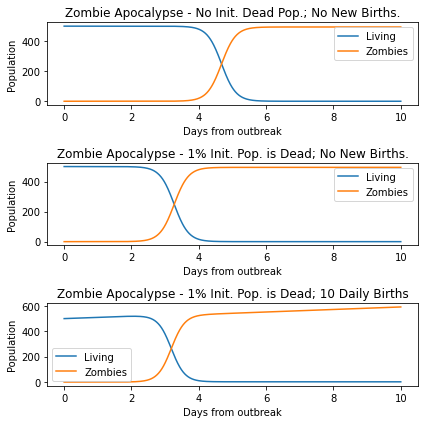

In [2]:
# Run model for three different sets of conditions
#
# 1. no initial dead population, no new births
#
# initial conditions
S0 = 500.               # initial population
Z0 = 0                  # initial zombie population
R0 = 0                  # initial death population
y0 = [S0, Z0, R0]       # initial condition vector
t  = np.linspace(0, 10., 1000)   # time grid

# solve the DEs
soln = solve_ivp(derivatives_szr, (0,10),y0, t_eval = t, args=(b, d, a, g, k))
S = soln.y[0, :]
Z = soln.y[1, :]
R = soln.y[2, :]

plt.figure(figsize=(6,6))
# plot results
plt.subplot(311)
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

#
# 2. 1% initial dead population, no new births
#
#
# update initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
y0 = [S0, Z0, R0]

# solve the DEs
soln = solve_ivp(derivatives_szr, (0,10),y0, t_eval = t, args=(b, d, a, g, k))
S = soln.y[0, :]
Z = soln.y[1, :]
R = soln.y[2, :]

plt.subplot(312)
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

#
# 3. 1% initial dead population, 10 new births daily
#
# 
b  = 10        # 10 new births daily

# solve the DEs
soln = solve_ivp(derivatives_szr, (0,10),y0, t_eval = t, args=(b, d, a, g, k))
S = soln.y[0, :]
Z = soln.y[1, :]
R = soln.y[2, :]

plt.subplot(313)
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)

plt.tight_layout()

___
### SIZR Model

To make this more realistic, we need to modify the code above to have a "latent/infected" class, which we will call **I**, and call this the SIZR model. Changes to the basic model include:
- Susceptibles first move to an infected class once infected and remain there for some period of time.
- Infected individuals can still die a ‘natural’ death before becoming zombies; otherwise, they become zombies at a certain rate. __Note:__ In many disease models, this might be called **L** for latent so that **I** can be used to refer to those that are infectious (i.e. can spread the disease). In our zombie model, the fully infected group is represented by Z.  (Zombie invasions are not your standard infectious disease!)


When we model infectious diseases, you will see more of this notation.  The model can now be presented graphically as:

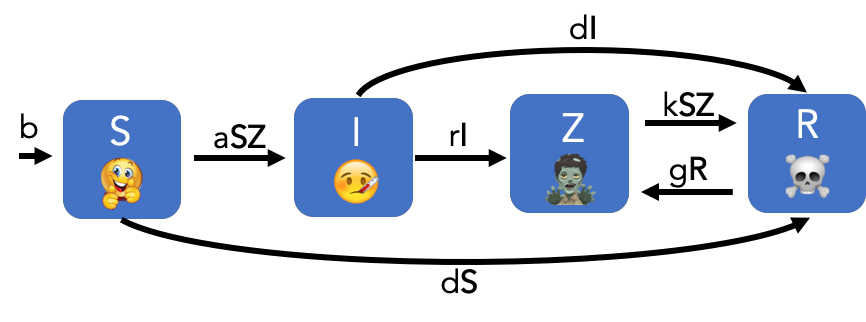

Next, **copy the code above and modify it to include the latent class**. Put the new version of the code here, using a different name for the function so that you can still use the original as a baseline case for comparison. 

For this model, **you need to implement a new parameter, $r$**. However, don't use the value that they mention in the paper. Instead, use $r = 0.5$. For this section **run the model for 20 days** since the latent phase will stall the zombie take-over!

You should get something that looks like this:

<img src="https://i.imgur.com/i3FuLFC.png" width=500px>

Put your code and plots here:

In [4]:
def derivatives_szr(t, y, b, d, a, g, k):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    dSidt = b - a*Si*Zi - d*Si
    dZidt = a*Si*Zi + g*Ri - k*Si*Zi
    dRidt = d*Si + k*Si*Zi - g*Ri
    return [dSidt, dZidt, dRidt]

def SIZR(t, y, b, d, a, g, k, r):
    Si = y[0]
    Ii = y[1]
    Zi = y[2]
    Ri = y[3]
    dSidt = b - a*Si*Zi - d*Si
    dIidt = a*Si*Zi - r*Ii - d*Ii
    dZidt = r*Ii + g*Ri - k*Si*Zi
    dRidt = d*Si + d*Ii+k*Si*Zi - g*Ri
    return [dSidt, dIidt, dZidt, dRidt]

def SIZRC(t, y, b, d, a, g, k, r,c):
    Si = y[0]
    Ii = y[1]
    Zi = y[2]
    Ri = y[3]
    # the model equations (see Munz et al. 2009)
    dSidt = b - a*Si*Zi - d*Si + c*Zi
    dIidt = a*Si*Zi - r*Ii - d*Ii
    dZidt = r*Ii + g*Ri - k*Si*Zi -c*Zi
    dRidt = d*Si + d*Ii+k*Si*Zi - g*Ri
    return [dSidt, dIidt, dZidt, dRidt]


# parameters
b = 0 # birth rate
d = 0.0001 # natural death percent (per day)
a = 0.0095 # transmission/attacked percent (per day)
g = 0.0001 # resurrect percent (per day)
k = 0.0001 # kill/destroy percent (per day)
r = 0.5 # conversion from infected to zombies (per day)
c1 = 1.0/2.0
c2 = 1.0/7.0
# initial condition
S0 = 500. # initial population
I0 = 0
Z0 = 0 # initial zombie population
R0 = 0 # initial death population

t0 = 0
# Here we put them all into a list so that they can be passed to solve_ivp
y_init = [S0, I0, Z0, R0] # initial condition vector
y_init_SZR = [S0, Z0, R0]
# final time
tf = 20
# time-step size
dt = 0.01
# generate the grid
N = int((tf-t0)/dt)
time = np.linspace(t0,tf,N+1)

sol_SZR = solve_ivp(derivatives_szr, (t0,tf), y_init_SZR, t_eval = time, args=(b, d, a, g, k)
sol_SIZR = solve_ivp(SIZR, (t0,tf), y_init, t_eval = time, args=(b, d, a, g, k, r))
sol_SIZRC_1 = solve_ivp(SIZRC, (t0,tf), y_init, t_eval = time, args=(b, d, a, g, k, r, c))
sol_SIZRC_2 = solve_ivp(SIZRC, (t0,tf), y_init, t_eval = time, args=(b, d, a, g, k, r, c))


SyntaxError: invalid syntax (4012165274.py, line 62)

In [ ]:
fig = plt.figure(figsize=(12,4))
S = sol_SZR.y[0, :]
Z = sol_SZR.y[1, :]
R = sol_SZR.y[2, :]
plt.plot(time,S,label="S normal",color="blue")
plt.plot(time,Z,label="Z normal",ls=":",color="blue")
S = sol_SIZR.y[0, :]
I = sol_SIZR.y[1, :]
Z = sol_SIZR.y[2, :]
R = sol_SIZR.y[3, :]
plt.plot(time,S,label="S sizr", color="green")
plt.plot(time,Z,label="Z sizr", ls=":",color="green")
S = sol_SIZRC_1.y[0, :]
I = sol_SIZRC_1.y[1, :]
Z = sol_SIZRC_1.y[2, :]
R = sol_SIZRC_1.y[3, :]
plt.plot(time,S,label="S treat, c=1/2",color="purple")
plt.plot(time,Z,label="Z treat, c=1/2",ls=":",color="purple")
S = sol_SIZRC_2.y[0, :]
I = sol_SIZRC_2.y[1, :]
Z = sol_SIZRC_2.y[2, :]
R = sol_SIZRC_2.y[3, :]
plt.plot(time,S,label="S treat, c=1/7",color="brown")
plt.plot(time,Z,label="Z treat, c=1/7",ls=":",color="brown")
plt.legend()


---
### SIZR model with a cure, SIZRC 

If/when there is a zombie invasion, the Centers for Disease Control and Prevention will be in charge of mitigating the impending disaster (we hope!). There are various tools in their toolbox for doing this, which have been developed for other diseases, but they are very busy dealing with things like the Coronavirus to have the resources to think about zombies right now. It would be great if you could help them by thinking about what to do in advance. Luckily, some work has already been done on this. Munz et al. have explored two mitigation strategies:
* quarantine
* treatment

For now, we would like to incorportate treatment aspects into this model.  In short, we want to be able to cure the zombies at a rate, $c$.  This new SIZR model with a cure can be presented as:

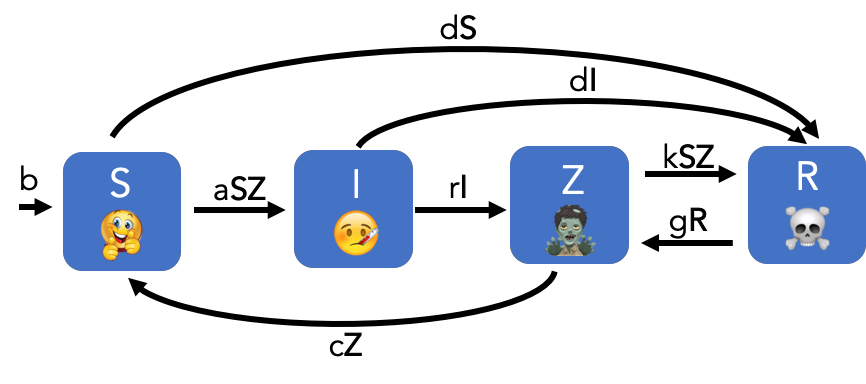


Now, copy the SIZR function you just wrote into a new function with a well-chosen names for the the SIZRC model. Modify the functions to include the curative effect presented in the graphic above. Finally, make a plot that presents the results from all three models using the original initial conditions:
1. the SZR model
2. the SIZR model
3. SIZR with cure (two cases)

Let's try two different cases for the cure rate, $c$, representing the rate in 1/days at which we can treat people.  Let's compare a fantastic treatment with a $c=1/2$ (takes two days to cure someone) and a mediocre treatment $c=1/7$.

In your plot, there should be eight curves in total, with four for the $S$ population and four for the $Z$ population for each scenario.  There are eight lines in this plot, so be clever with your use of color, linestyle and legend. Put your code and plots here:


In [ ]:
def SIZRC(t, y, b, d, a, g, k, r,c):
    Si = y[0]
    Ii = y[1]
    Zi = y[2]
    Ri = y[3]
    dSidt = b - a*Si*Zi - d*Si + c*Zi
    dIidt = a*Si*Zi - r*Ii - d*Ii
    dZidt = r*Ii + g*Ri - k*Si*Zi -c*Zi
    dRidt = d*Si + d*Ii+k*Si*Zi - g*Ri
    return [dSidt, dIidt, dZidt, dRidt]

fig = plt.figure(figsize=(12,4))
S = sol_SZR.y[0, :]
Z = sol_SZR.y[1, :]
R = sol_SZR.y[2, :]
plt.plot(time,S,label="S normal",color="blue")
plt.plot(time,Z,label="Z normal",ls=":",color="blue")
S = sol_SIZR.y[0, :]
I = sol_SIZR.y[1, :]
Z = sol_SIZR.y[2, :]
R = sol_SIZR.y[3, :]
plt.plot(time,S,label="S sizr", color="green")
plt.plot(time,Z,label="Z sizr", ls=":",color="green")
S = sol_SIZRC_1.y[0, :]
I = sol_SIZRC_1.y[1, :]
Z = sol_SIZRC_1.y[2, :]
R = sol_SIZRC_1.y[3, :]
plt.plot(time,S,label="S treat, c=1/2",color="purple")
plt.plot(time,Z,label="Z treat, c=1/2",ls=":",color="purple")
S = sol_SIZRC_2.y[0, :]
I = sol_SIZRC_2.y[1, :]
Z = sol_SIZRC_2.y[2, :]
R = sol_SIZRC_2.y[3, :]
plt.plot(time,S,label="S treat, c=1/7",color="brown")
plt.plot(time,Z,label="Z treat, c=1/7",ls=":",color="brown")
plt.legend()

**What do you conclude?** Based on your results, what is your recommendation to the CDC about your treatments?  Are they good enough for people to survive?  What aspects of the model do you feel need to be refined?

<font size="+3">&#9998;</font> I'm not gonna lie, I spent a lot of time on this assignment and barely got my code to work so I wasn't able to come up with a conclusion im sorry

## Optional
If you want additional practice or have aspirations to work in zombie mitigation in your career, consider implementing the quarantine mitigation strategy discussed in the Munz paper.  Is a quarantine system a worthy strategy to save the human race?

---
## Assignment Wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [5]:
from IPython.display import HTML

HTML("""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
""")

### Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees